[video link](https://www.youtube.com/watch?v=7O4dpR9QMIM&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t&index=5)

## Upload the data

Imports necessary libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

upload the data

In [32]:
df = pd.read_csv("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv", index_col=0, header=[0, 1])

In [33]:
df = df[df['Job_details']['Region'] == 'Europe']

In [34]:
# choose relevant columns
df.columns.tolist()


[('Job_details', 'Title'),
 ('Job_details', 'Description'),
 ('Job_details', 'Is_contract'),
 ('Job_details', 'Seniority'),
 ('Job_details', 'City'),
 ('Job_details', 'State'),
 ('Job_details', 'Country'),
 ('Job_details', 'Region'),
 ('Job_details', 'Job_age'),
 ('Job_details', 'Easy_apply'),
 ('Salary', 'Min'),
 ('Salary', 'Max'),
 ('Salary', 'Avg'),
 ('Salary', 'Currency'),
 ('Salary', 'Employer_provided'),
 ('Salary', 'Is_hourly'),
 ('Salary', 'Specified'),
 ('Company_info', 'Name'),
 ('Company_info', 'Rating'),
 ('Company_info', 'Employees'),
 ('Company_info', 'Type_of_ownership'),
 ('Company_info', 'Sector'),
 ('Company_info', 'Industry'),
 ('Company_info', 'Company_age'),
 ('Company_info', 'Revenue_USD'),
 ('Company_info', 'Friend_recommend'),
 ('Company_info', 'CEO_approval'),
 ('Company_info', 'Career_opportunities'),
 ('Company_info', 'Comp_&_benefits'),
 ('Company_info', 'Senior_management'),
 ('Company_info', 'Work/Life_balance'),
 ('Company_info', 'Culture_&_values'),
 ('C

### Select the relevant data 

In [35]:
df_model = pd.DataFrame()

columns_to_move = [
    ('Job_details', 'Country'),
    ('Job_details', 'Seniority'),
    ('Job_details', 'Job_age'),
    ('Salary', 'Avg'),
    ('Salary', 'Employer_provided'),
    ('Salary', 'Is_hourly'),
    ('Company_info', 'Rating'),
    ('Company_info', 'Employees'),
    ('Company_info', 'Type_of_ownership'),
    ('Company_info', 'Sector'),
    ('Company_info', 'Company_age'),
    ('Company_info', 'Revenue_USD'),
    ('Programming_languages', 'SQL'),
    ('Programming_languages', 'Python'),
    ('Programming_languages', 'Java'),
    ('Programming_languages', 'Scala'),
    ('Cloud_platforms', 'Microsoft_Azure'),
    ('Cloud_platforms', 'AWS'),
    ('Cloud_platforms', 'GPC'),
    ('Data_integration_and_processing', 'Databricks'),
    ('Search_&_Analytics', 'Snowflake'),
    ('Stream_processing_tools', 'Apache_Kafka'),
    ('Big_Data_processing', 'Apache_Spark')
]

extracted_columns = df.loc[:, columns_to_move]

extracted_columns.columns = extracted_columns.columns.droplevel(0)

extracted_columns = extracted_columns.rename(columns={'Avg': 'Salary_avg'})

df_model[extracted_columns.columns] = extracted_columns

df_model.columns


Index(['Country', 'Seniority', 'Job_age', 'Salary_avg', 'Employer_provided',
       'Is_hourly', 'Rating', 'Employees', 'Type_of_ownership', 'Sector',
       'Company_age', 'Revenue_USD', 'SQL', 'Python', 'Java', 'Scala',
       'Microsoft_Azure', 'AWS', 'GPC', 'Databricks', 'Snowflake',
       'Apache_Kafka', 'Apache_Spark'],
      dtype='object')

In [36]:
bi_subcolumns = df['Business_Intelligence_Tools'].columns

is_true = df['Business_Intelligence_Tools'][bi_subcolumns].any(axis=1)
df_model['BI_Tools'] = is_true.astype(bool)

In [37]:
# better get any estimation than none, even if model is not so accurate
df_model = df_model.dropna(subset=['Salary_avg'])

In [38]:
# To avoid bugs with infinitive values
df_model = df_model.fillna(-1)

In [39]:
len(df_model)

343

In [40]:
df_model.head()

,Country,Seniority,Job_age,Salary_avg,Employer_provided,Is_hourly,Rating,Employees,Type_of_ownership,Sector,...,Java,Scala,Microsoft_Azure,AWS,GPC,Databricks,Snowflake,Apache_Kafka,Apache_Spark,BI_Tools
66,Austria,Junior,11,39804.0,True,False,4.1,1 to 50,Company - Private,-1,...,False,False,False,False,False,False,False,False,False,False
78,Austria,-1,4,46434.0,True,False,-1.0,-1,-1,-1,...,False,False,False,False,False,False,False,False,False,False
217,Belgium,-1,27,46439.0,True,False,-1.0,-1,-1,-1,...,False,False,False,False,False,False,False,False,False,False
225,Belgium,Management,5,60813.0,True,False,-1.0,-1,-1,-1,...,False,False,False,False,False,False,False,False,False,False
234,Belgium,-1,31,60813.5,True,False,4.3,1 to 50,Company - Private,Management & Consulting,...,False,False,False,False,False,False,False,False,False,False


## Get dummy data

Transforms categorical variables into numerical form by creating binary indicator variables for each category, resulting in a new DataFrame called 'df_dum'

In [41]:
df_dum = pd.get_dummies(df_model)

In [42]:
df_dum.columns

Index(['Job_age', 'Salary_avg', 'Employer_provided', 'Is_hourly', 'Rating',
       'Company_age', 'SQL', 'Python', 'Java', 'Scala', 'Microsoft_Azure',
       'AWS', 'GPC', 'Databricks', 'Snowflake', 'Apache_Kafka', 'Apache_Spark',
       'BI_Tools', 'Country_Austria', 'Country_Belgium',
       'Country_Czech Republic', 'Country_Denmark', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_Poland', 'Country_Portugal',
       'Country_Romania', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_United Kingdom', 'Seniority_-1',
       'Seniority_Junior', 'Seniority_Management', 'Seniority_Mid',
       'Seniority_Senior', 'Employees_-1', 'Employees_1 to 50',
       'Employees_10000+', 'Employees_1001 to 5000', 'Employees_201 to 500',
       'Employees_5001 to 10000', 'Employees_501 to 1000',
       'Employees_51 to 200', 'Type_of_ownership_-1',
       'Type_of_ownership_College / Un

## Train the split
Splits the data into two separate datasets, one for training the model and the other for testing its performance, using the train_test_split function from scikit-learn.

In [43]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Salary_avg', axis =1)
y = df_dum['Salary_avg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
my_xnames = X.columns

new_index = pd.Index(["Salary_avg"])

my_xnames = pd.Index(new_index.tolist() + my_xnames.tolist())

## Multiple linear regression
Utilizes the OLS method from the statsmodels library to estimate the relationship between multiple independent variables and a dependent variable through linear regression.

In [45]:
import statsmodels.api as sm

X = np.asarray(X)
y = np.asarray(y)

X = np.nan_to_num(X)
y = np.nan_to_num(y)

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X_sm = X = sm.add_constant(X)

model = sm.OLS(y,X_sm)
model.data.xnames = my_xnames.tolist()

In [46]:
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     10.76
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           1.37e-49
Time:                        18:21:59   Log-Likelihood:                -3879.7
No. Observations:                 343   AIC:                             7925.
Df Residuals:                     260   BIC:                             8244.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Salary_avg                                          2.715e+04   6941.093      3.911      0.000    1.35e+04    4.08e+04
Job_age                                              209.1426    134.480      1.555      0.121     -55.666     473.951
Employer_provided                                   8985.4136   5262.184      1.708      0.089   -1376.512    1.93e+04
Is_hourly                                           6.445e+04   4507.925     14.297      0.000    5.56e+04    7.33e+04
Rating                                              2142.4461   1056.568      2.028      0.044      61.926    4222.966
Company_age                                          -76.8545     41.031     -1.873      0.062    -157.649       3.940
SQL                                                -2104.7576   4186.304     -0.503      0.616   -1.03e+04    6138.618
Python                                              4805.8514   4471.261      1.075      0.283   -3998.642    1.36e+04
Java                                               -9236.8026   8937.210     -1.034      0.302   -2.68e+04    8361.726
Scala                                               1.817e+04   9171.049      1.981      0.049     110.578    3.62e+04
Microsoft_Azure                                    -2619.4257   4511.978     -0.581      0.562   -1.15e+04    6265.245
AWS                                                 9407.5440   5306.120      1.773      0.077   -1040.895    1.99e+04
GPC                                                 3292.5340   5611.263      0.587      0.558   -7756.772    1.43e+04
Databricks                                          8336.4281   7415.850      1.124      0.262   -6266.344    2.29e+04
Snowflake                                           3261.1853   7360.119      0.443      0.658   -1.12e+04    1.78e+04
Apache_Kafka                                        2191.7976   9446.419      0.232      0.817   -1.64e+04    2.08e+04
Apache_Spark                                       -9326.3502   6461.238     -1.443      0.150    -2.2e+04    3396.668
BI_Tools                                            6469.2670   5372.680      1.204      0.230   -4110.238     1.7e+04
Country_Austria                                     2570.6230   1.61e+04      0.160      0.873   -2.91e+04    3.43e+04
Country_Belgium                                     1.079e+04   1.08e+04      0.999      0.319   -1.05e+04    3.21e+04
Country_Czech Republic                             -7.666e+04    2.3e+04     -3.332      0.001   -1.22e+05   -3.13e+04
Country_Denmark                                    -4.348e+04   2.24e+04     -1.945      0.053   -8.75e+04     545.605
Country_Finland                                     1.303e+04   2.28e+04      0.570      0.569    -3.2e+04  

with salaries only

```
                        coef	        std err	        t	P>|t|	       [0.025	        0.975]
BI_Tools	        2663.3717	1178.993	2.259	0.024	        351.301	        4975.443
Python	                1141.8297	792.865	        1.440	0.150	       -413.024	        2696.683
Snowflake	        375.9198	1576.159	0.239	0.812	       -2715.016	3466.856
Employer_provided	81.2503	        1937.430	0.042	0.967	       -3718.159	3880.659
AWS	                1721.8805	893.037	        1.928	0.054	       -29.415	        3473.176
GPC	                1434.0168	1302.776	1.101	0.271	       -1120.800	3988.834
Apache_Kafka	        2191.7976	9446.419	0.232	0.817	       -1.64e+04	2.08e+04
Apache_Spark	        -9326.3502	6461.238	-1.443	0.150	       -2.2e+04	        3396.668
```

with salaries + nans

```
                        coef	        std err	        t	P>|t|	       [0.025	        0.975]
BI_Tools	        2663.3717	1178.993	2.259	0.024	        351.301	        4975.443
Python	                1141.8297	792.865	        1.440	0.150	       -413.024	        2696.683
Snowflake	        375.9198	1576.159	0.239	0.812	       -2715.016	3466.856
Employer_provided	81.2503	        1937.430	0.042	0.967	       -3718.159	3880.659
AWS	                1721.8805	893.037	        1.928	0.054	       -29.415	        3473.176
GPC	                1434.0168	1302.776	1.101	0.271	       -1120.800	3988.834
```

In [47]:
from statsmodels.iolib.table import SimpleTable

def get_t_results(results, t_cap):
    table_index = 1

    table_data = results.tables[table_index].data

    filtered_data = [row for row in table_data if float(row[-2].replace("[", "")) >= t_cap]

    sorted_data = sorted(filtered_data, key=lambda x: float(x[-2].replace("[", "")), reverse=True)

    filtered_table = SimpleTable(sorted_data, title=results.tables[table_index].title)

    return filtered_table

get_t_results(results, 0.05)

Country_Switzerland,8.718e+04,7716.277,11.298,0.000,7.2e+04,1.02e+05
Is_hourly,6.445e+04,4507.925,14.297,0.000,5.56e+04,7.33e+04
Salary_avg,2.715e+04,6941.093,3.911,0.000,1.35e+04,4.08e+04
Country_United Kingdom,1.722e+04,4815.494,3.576,0.000,7739.678,2.67e+04
Revenue_USD_$10+ billion,1.875e+04,6978.051,2.687,0.008,5009.128,3.25e+04
Country_Ireland,1.448e+04,5893.609,2.457,0.015,2873.068,2.61e+04
Country_France,1.044e+04,4810.308,2.170,0.031,964.329,1.99e+04
Scala,1.817e+04,9171.049,1.981,0.049,110.578,3.62e+04
Rating,2142.4461,1056.568,2.028,0.044,61.926,4222.966


In [48]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-23402.987061781565

## lasso regression
Performs Lasso regression with different alpha values and calculates the mean absolute error for each alpha value.

In [49]:
lm_l = Lasso(alpha=.31)
lm_l.fit(X_train,y_train)
avg_score = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
avg_score

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+10, tolerance: 4.424e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+10, tolerance: 3.020e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

-23353.669514139998

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+10, tolerance: 3.020e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+10, tolerance: 3.010e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+10, tolerance: 2.807e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+10, tolerance: 3.020e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

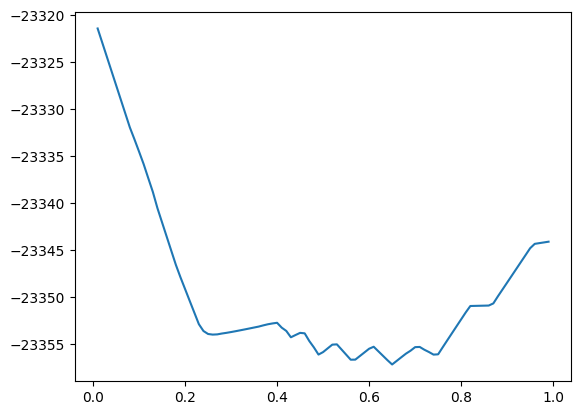

In [50]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [51]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-23321.430004


## Random Forest
Creates a random forest regressor (rf) and calculates the mean absolute error using cross-validation.

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-17618.559760139146

## Tune Models GridsearchCV
Performs hyperparameter tuning for the random forest model using GridSearchCV, trying different combinations of n_estimators, criterion, and max_features.

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('friedman_mse','absolute_error', 'poisson', 'squared_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      n_estimators=150)

## test ensembles
- Loads the pickle file and retrieves the model.
- Makes predictions using the loaded model on a sample test instance.
- Prints the list of features for the second instance in the test set.

In [54]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(f"tpred_lm: {mean_absolute_error(y_test,tpred_lm)}")
print(f"tpred_lml: {mean_absolute_error(y_test,tpred_lml)}")
print(f"tpred_rf: {mean_absolute_error(y_test,tpred_rf)}")

print(f"tpred_lm + tpred_rf: {mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)}")
print(f"tpred_lm + tpred_lml: {mean_absolute_error(y_test,(tpred_lm+tpred_lml)/2)}")
print(f"tpred_rf + tpred_lml: {mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)}")

tpred_lm: 36663729571210.88
tpred_lml: 20940.446204239193
tpred_rf: 19019.313919599717
tpred_lm + tpred_rf: 18331864794186.76
tpred_lm + tpred_lml: 18331864795716.176
tpred_rf + tpred_lml: 19072.733416266547
